In [1]:
#As a first step we will import the important libraries. then upload our data to start explore it 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("Airline Passenger Satisfaction Data.csv")

In [3]:
df

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,...,2,2,2,2,4,2,4,0,20.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
129876,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
129877,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
129878,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [4]:
df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129880 non-null  int64  
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Inflight wifi service              129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Ease of Online booking             129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Food and drink                     1298

In [6]:
df.shape

(129880, 24)

In [7]:
# we can see that we have missing values in the "Arrival Delay in Minutes". Let's check their count
df.isnull().sum()

id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
satisfaction                           0
dtype: int64

In [8]:
(df['Arrival Delay in Minutes'].isnull().sum())/(len(df.index))

0.003025870033877425

In [9]:
# we can see that it represent a small percentage of the whole data hence it will be better to drop the rows with that missing values.Also we will drop the feature "id" since it will not affect the result
df = df.dropna()
df = df.drop('id',axis=1)
df.shape

(129487, 23)

In [10]:
# now let's adjust the features name to check their unique values.
df.rename (columns= {
    'Customer Type' : 'Customer_Type',
    'Type of Travel': 'Type_of_Travel'    
}, inplace = True)

In [11]:
print (df.Gender.unique())
print (df.Customer_Type.unique())
print (df.Type_of_Travel.unique())
print (df.Class.unique())
print (df.satisfaction.unique())

# as we can see all the values are cleaned 

['Female' 'Male']
['Loyal Customer' 'disloyal Customer']
['Business travel' 'Personal Travel']
['Eco' 'Business' 'Eco Plus']
['satisfied' 'neutral or dissatisfied']


In [12]:
df.duplicated().any() 
#no duplicates records in the data

False

In [13]:
# Let's check the outliers !
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,129487.0,39.428761,15.117597,7.0,27.0,40.0,51.0,85.0
Flight Distance,129487.0,1190.210662,997.560954,31.0,414.0,844.0,1744.0,4983.0
Inflight wifi service,129487.0,2.728544,1.329235,0.0,2.0,3.0,4.0,5.0
Departure/Arrival time convenient,129487.0,3.057349,1.526787,0.0,2.0,3.0,4.0,5.0
Ease of Online booking,129487.0,2.756786,1.401662,0.0,2.0,3.0,4.0,5.0
Gate location,129487.0,2.976909,1.278506,0.0,2.0,3.0,4.0,5.0
Food and drink,129487.0,3.204685,1.329905,0.0,2.0,3.0,4.0,5.0
Online boarding,129487.0,3.252720,1.350651,0.0,2.0,3.0,4.0,5.0
Seat comfort,129487.0,3.441589,1.319168,0.0,2.0,4.0,5.0,5.0
Inflight entertainment,129487.0,3.358067,1.334149,0.0,2.0,4.0,4.0,5.0


<AxesSubplot:xlabel='Departure Delay in Minutes'>

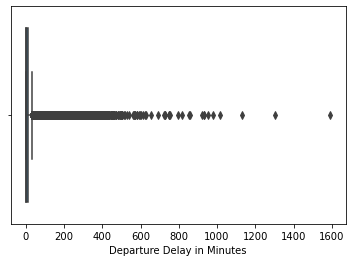

In [14]:
# we can see that the the max of "Departure Delay in Minutes" and "Arrival Delay in Minutes" look to be large comparing with their mean so they will be maybe outliers . Let's see the box plot of them
sns.boxplot(x=df['Departure Delay in Minutes'])

<AxesSubplot:xlabel='Arrival Delay in Minutes'>

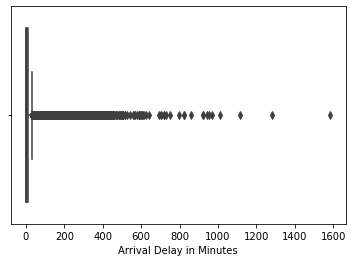

In [15]:
sns.boxplot(x=df['Arrival Delay in Minutes'])

In [16]:
df.loc[df['Departure Delay in Minutes'] > 1100]

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
17429,Male,Loyal Customer,8,Personal Travel,Eco,1144,2,5,2,2,...,4,4,3,5,1,3,1,1128,1115.0,neutral or dissatisfied
32720,Male,Loyal Customer,32,Business travel,Business,2916,2,2,2,2,...,3,4,5,4,5,3,5,1305,1280.0,satisfied
109717,Female,Loyal Customer,47,Personal Travel,Eco,1120,2,2,2,3,...,2,4,4,4,2,3,2,1592,1584.0,neutral or dissatisfied


In [17]:
# we can see that they have an extremely large values,since we have a large data we prefere to drop them
df.drop(df[df['Departure Delay in Minutes'] > 1100].index,inplace=True)
df.shape

(129484, 23)

In [18]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,129484.0,39.429003,15.117491,7.0,27.0,40.0,51.0,85.0
Flight Distance,129484.0,1190.198233,997.560954,31.0,414.0,844.0,1744.0,4983.0
Inflight wifi service,129484.0,2.728561,1.329246,0.0,2.0,3.0,4.0,5.0
Departure/Arrival time convenient,129484.0,3.057351,1.526790,0.0,2.0,3.0,4.0,5.0
Ease of Online booking,129484.0,2.756804,1.401673,0.0,2.0,3.0,4.0,5.0
Gate location,129484.0,2.976924,1.278515,0.0,2.0,3.0,4.0,5.0
Food and drink,129484.0,3.204689,1.329903,0.0,2.0,3.0,4.0,5.0
Online boarding,129484.0,3.252718,1.350642,0.0,2.0,3.0,4.0,5.0
Seat comfort,129484.0,3.441607,1.319152,0.0,2.0,4.0,5.0,5.0
Inflight entertainment,129484.0,3.358075,1.334158,0.0,2.0,4.0,4.0,5.0


<AxesSubplot:xlabel='Departure Delay in Minutes'>

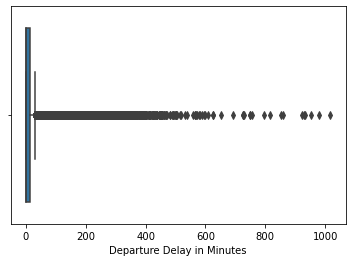

In [19]:
sns.boxplot(x=df['Departure Delay in Minutes'])

<AxesSubplot:xlabel='Arrival Delay in Minutes'>

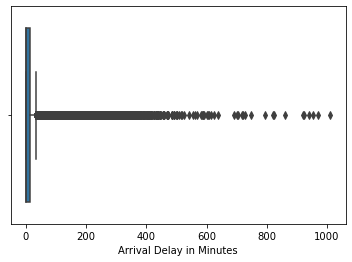

In [20]:
sns.boxplot(x=df['Arrival Delay in Minutes'])

In [21]:
df.columns

Index(['Gender', 'Customer_Type', 'Age', 'Type_of_Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [22]:
X = df.drop('satisfaction', axis = 1)

In [23]:
df['satisfaction'] = df.satisfaction.map({'satisfied' :1, 'neutral or dissatisfied' : 0})

In [24]:
y = df['satisfaction']

In [26]:
# now let'start to prepare the data for the prediction !
# we will convert our target-variable and the other categorical data into 0 and 1 in order for our machine learning models to be able to classify the data
X = pd.get_dummies(X)

In [27]:
df.dtypes

Gender                                object
Customer_Type                         object
Age                                    int64
Type_of_Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
satisfacti

In [28]:
df

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,...,5,5,5,5,2,5,5,50,44.0,1
1,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,...,4,4,4,4,3,4,5,0,0.0,1
2,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,...,2,4,1,3,2,2,2,0,0.0,0
3,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,...,1,1,1,1,3,1,4,0,6.0,1
4,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,...,2,2,2,2,4,2,4,0,20.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,3,...,2,3,1,4,2,3,2,3,0.0,0
129876,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,4,...,5,5,5,5,5,5,4,0,0.0,1
129877,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,3,...,4,3,2,4,5,5,4,7,14.0,0
129878,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,5,...,1,4,5,1,5,4,1,0,0.0,0


In [29]:
df.columns

Index(['Gender', 'Customer_Type', 'Age', 'Type_of_Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [30]:
df['satisfaction'].value_counts()

0    73223
1    56261
Name: satisfaction, dtype: int64

<AxesSubplot:>

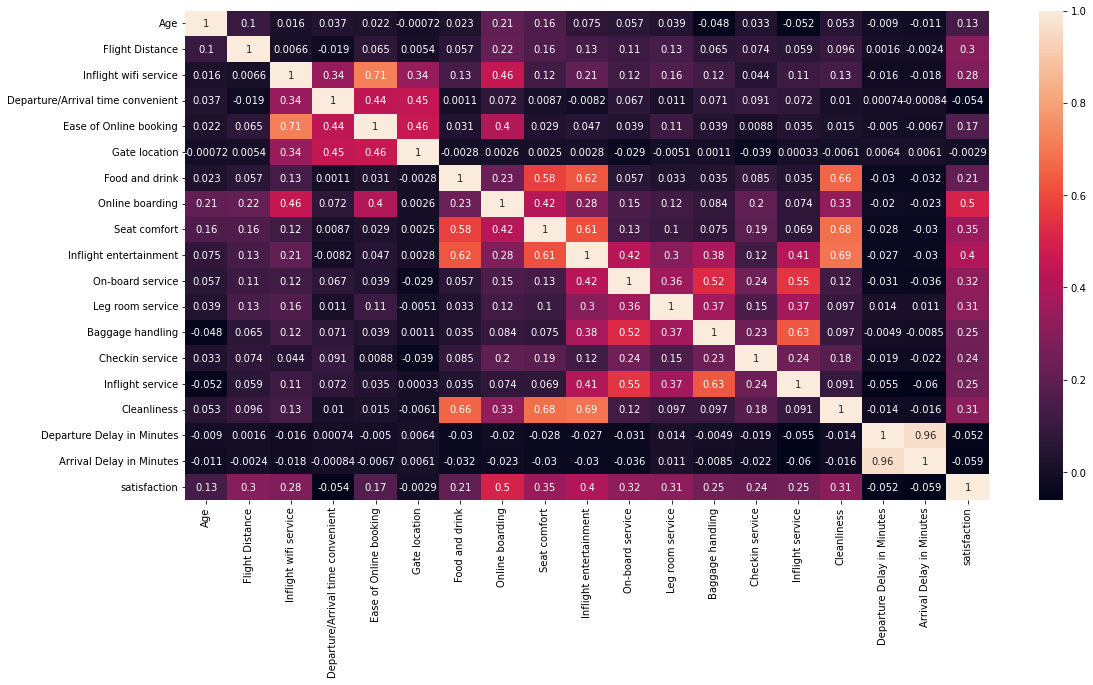

In [31]:
#The majority of personal travel passengers are not satisfied
#Now let's visualize our correlation matrix using a heatmap. 
#then print out the highest correlated variables to our y-variable (satisfaction).

plt.figure(figsize = (18,9))
sns.heatmap(df.corr(), annot=True)

In [32]:
df.corr().abs()['satisfaction'].sort_values(ascending = False)

satisfaction                         1.000000
Online boarding                      0.501616
Inflight entertainment               0.398339
Seat comfort                         0.348558
On-board service                     0.322336
Leg room service                     0.312553
Cleanliness                          0.306871
Flight Distance                      0.298196
Inflight wifi service                0.283293
Baggage handling                     0.248663
Inflight service                     0.245028
Checkin service                      0.237123
Food and drink                       0.211145
Ease of Online booking               0.168704
Age                                  0.133999
Arrival Delay in Minutes             0.058912
Departure/Arrival time convenient    0.054448
Departure Delay in Minutes           0.051604
Gate location                        0.002921
Name: satisfaction, dtype: float64

<AxesSubplot:xlabel='satisfaction', ylabel='Online boarding'>

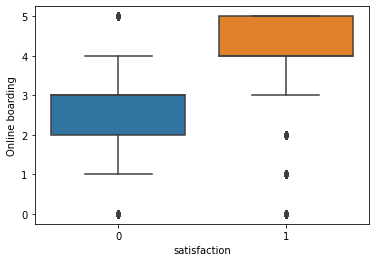

In [33]:
# We can see that the variables that are the most highly correlated to our y-variable are:
# Class and Online boarding with (50%) correlation.
sns.boxplot(x='satisfaction', y='Online boarding', data=df)

# 0 = neutral or dissatisfied
# 1 = satisfied

In [34]:
# For some people, even though they had a good online boarding experience, they weren't satisified.
# Let's start the prediction process
#Let's start the prediction process

In [35]:
# we will divide our data to training and testing data set 

from sklearn.model_selection import train_test_split
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape)
print(X_test.shape)

(103587, 27)
(25897, 27)


In [36]:
# we will import some libraries that help us to do the ML models

# command line install, uncomment line below
#!conda install -y -c conda-forge xgboost

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
#from xgboost import XGBClassifier

In [37]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [38]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred1 = knn.predict(X_test)
score1=metrics.accuracy_score(y_test, y_pred1)
print(score1)

0.751477005058501


In [39]:
decisiontree = DecisionTreeClassifier()
decisiontree.fit(X_train, y_train)
y_pred2 = decisiontree.predict(X_test)
score2=metrics.accuracy_score(y_test, y_pred2)
print(score2)

0.9464030582692976


In [40]:
randomforest = RandomForestClassifier()
randomforest.fit(X_train, y_train)
y_pred3 = randomforest.predict(X_test)
score3=metrics.accuracy_score(y_test, y_pred3)
print(score3)

0.9642429625053095


In [45]:
# let's print out all the model's accurcy
print('Accuracy:-\n')
print("KNN: {} \nDecision Tree: {} \nRandom Forest: {}\n".format(score1,score2,score3))

Accuracy:-

KNN: 0.751477005058501 
Decision Tree: 0.9464030582692976 
Random Forest: 0.9642429625053095



In [ ]:
#It looks like our  model performs the best out of all our models -- with an +..% score!
#In general also the Random Forest do better on this dataset.

#Also there are many plot and relations we can investigate them and many method to calculate the scores such as F1-score, Precision and Recall. But due to time constraints, we were able to find the accuracy only.We will work to complate this project to enhance the results and the findings.